In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN, LSTM , Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [2]:
X = [[[(5**i)+j] for i in range (5)] for j in range(100)]
print (X)
Y = [(3125+5*i) for i in range(100)]
print (Y)

[[[1], [5], [25], [125], [625]], [[2], [6], [26], [126], [626]], [[3], [7], [27], [127], [627]], [[4], [8], [28], [128], [628]], [[5], [9], [29], [129], [629]], [[6], [10], [30], [130], [630]], [[7], [11], [31], [131], [631]], [[8], [12], [32], [132], [632]], [[9], [13], [33], [133], [633]], [[10], [14], [34], [134], [634]], [[11], [15], [35], [135], [635]], [[12], [16], [36], [136], [636]], [[13], [17], [37], [137], [637]], [[14], [18], [38], [138], [638]], [[15], [19], [39], [139], [639]], [[16], [20], [40], [140], [640]], [[17], [21], [41], [141], [641]], [[18], [22], [42], [142], [642]], [[19], [23], [43], [143], [643]], [[20], [24], [44], [144], [644]], [[21], [25], [45], [145], [645]], [[22], [26], [46], [146], [646]], [[23], [27], [47], [147], [647]], [[24], [28], [48], [148], [648]], [[25], [29], [49], [149], [649]], [[26], [30], [50], [150], [650]], [[27], [31], [51], [151], [651]], [[28], [32], [52], [152], [652]], [[29], [33], [53], [153], [653]], [[30], [34], [54], [154], [

In [0]:
X = np.array(X, dtype="float32")
Y = np.array(Y, dtype="float32")

In [0]:
X /= 500
Y /= 500

In [5]:
X.shape

(100, 5, 1)

In [6]:
Y.shape

(100,)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, 
                                                random_state=5)

In [8]:
X_train

array([[[0.19 ],
        [0.198],
        [0.238],
        [0.438],
        [1.438]],

       [[0.114],
        [0.122],
        [0.162],
        [0.362],
        [1.362]],

       [[0.046],
        [0.054],
        [0.094],
        [0.294],
        [1.294]],

       [[0.08 ],
        [0.088],
        [0.128],
        [0.328],
        [1.328]],

       [[0.05 ],
        [0.058],
        [0.098],
        [0.298],
        [1.298]],

       [[0.028],
        [0.036],
        [0.076],
        [0.276],
        [1.276]],

       [[0.128],
        [0.136],
        [0.176],
        [0.376],
        [1.376]],

       [[0.144],
        [0.152],
        [0.192],
        [0.392],
        [1.392]],

       [[0.112],
        [0.12 ],
        [0.16 ],
        [0.36 ],
        [1.36 ]],

       [[0.176],
        [0.184],
        [0.224],
        [0.424],
        [1.424]],

       [[0.014],
        [0.022],
        [0.062],
        [0.262],
        [1.262]],

       [[0.178],
        [0.186],
        [

In [9]:
from keras.layers import SimpleRNN,LSTM,Flatten
model = Sequential()
model.add(LSTM((2),input_shape=(5,1),return_sequences=True))
model.add(LSTM((3),input_shape=(5,1),return_sequences=True))
model.add(Flatten())
model.add(Dense(1,activation='relu'))
#model.compile(optimizer='adam',loss='mae',metrics=['acc'])
model.compile(optimizer='adam',loss='mae',metrics=['acc'])

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 5, 2)              32        
_________________________________________________________________
lstm_2 (LSTM)                (None, 5, 3)              72        
_________________________________________________________________
flatten_1 (Flatten)          (None, 15)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 16        
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [11]:
hist = model.fit(X_train, y_train, epochs=1000, batch_size=64, validation_data=(X_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 80 samples, validate on 20 samples
Epoch 1/1000





80/80 [==============================] - 2s 25ms/step - loss: 6.7595 - acc: 0.0000e+00 - val_loss: 6.6797 - val_acc: 0.0000e+00
Epoch 2/1000
80/80 [==============================] - 0s 306us/step - loss: 6.7547 - acc: 0.0000e+00 - val_loss: 6.6747 - val_acc: 0.0000e+00
Epoch 3/1000
80/80 [==============================] - 0s 309us/step - loss: 6.7497 - acc: 0.0000e+00 - val_loss: 6.6697 - val_acc: 0.0000e+00
Epoch 4/1000
80/80 [==============================] - 0s 292us/step - loss: 6.7446 - acc: 0.0000e+00 - val_loss: 6.6648 - val_acc: 0.0000e+00
Epoch 5/1000
80/80 [==============================] - 0s 295us/step - loss: 6.7396 - acc: 0.0000e+00 - val_loss: 6.6598 - val_acc: 0.0000e+00
Epoch 6/1000
80/80 [==============================] - 0s 288us/step - loss: 6.7345 - acc: 0.0000e+00 - val_loss: 6.6547 - val_acc: 0.0000e+00
Epo

In [0]:
y_predict = model.predict(X_test)

In [13]:
np.round(y_predict*500)

array([[3456.],
       [3287.],
       [3359.],
       [3266.],
       [3493.],
       [3239.],
       [3167.],
       [3222.],
       [3206.],
       [3303.],
       [3593.],
       [3313.],
       [3475.],
       [3329.],
       [3428.],
       [3297.],
       [3339.],
       [3413.],
       [3178.],
       [3470.]], dtype=float32)

In [14]:
np.round(y_test*500)

array([3455., 3285., 3355., 3265., 3495., 3240., 3175., 3225., 3210.,
       3300., 3610., 3310., 3475., 3325., 3425., 3295., 3335., 3410.,
       3185., 3470.], dtype=float32)

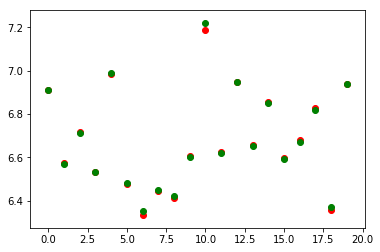

In [15]:
plt.scatter(range(20),y_predict,c = 'r')
plt.scatter(range(20),y_test ,c='g')
plt.show()

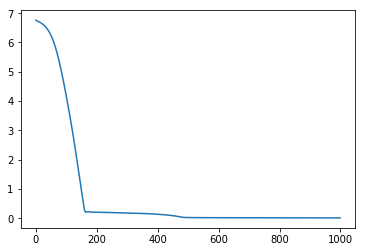

In [16]:
plt.plot(hist.history['loss'])
plt.show()